In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../Data.csv')

In [3]:
dft = pd.read_csv('testing3.csv')

In [4]:
df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,label
0,71,71,64,98,150,86,68,209,left
1,72,72,63,98,149,84,69,205,left
2,72,75,66,98,152,82,73,202,left
3,75,72,66,98,154,84,75,199,left
4,74,75,65,98,159,85,79,195,left


In [5]:
dft.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,label
0,139,88,166,169,86,157,168,206,left
1,139,91,168,168,85,156,164,201,left
2,136,91,164,173,85,147,172,200,left
3,137,91,165,170,85,149,170,193,left
4,137,89,166,173,84,141,173,198,left


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(df.drop('label',axis=1),df['label'])
    pred_i = knn.predict(dft.drop('label',axis=1))
    error_rate.append(np.mean(pred_i != dft['label']))

Text(0, 0.5, 'Error Rate')

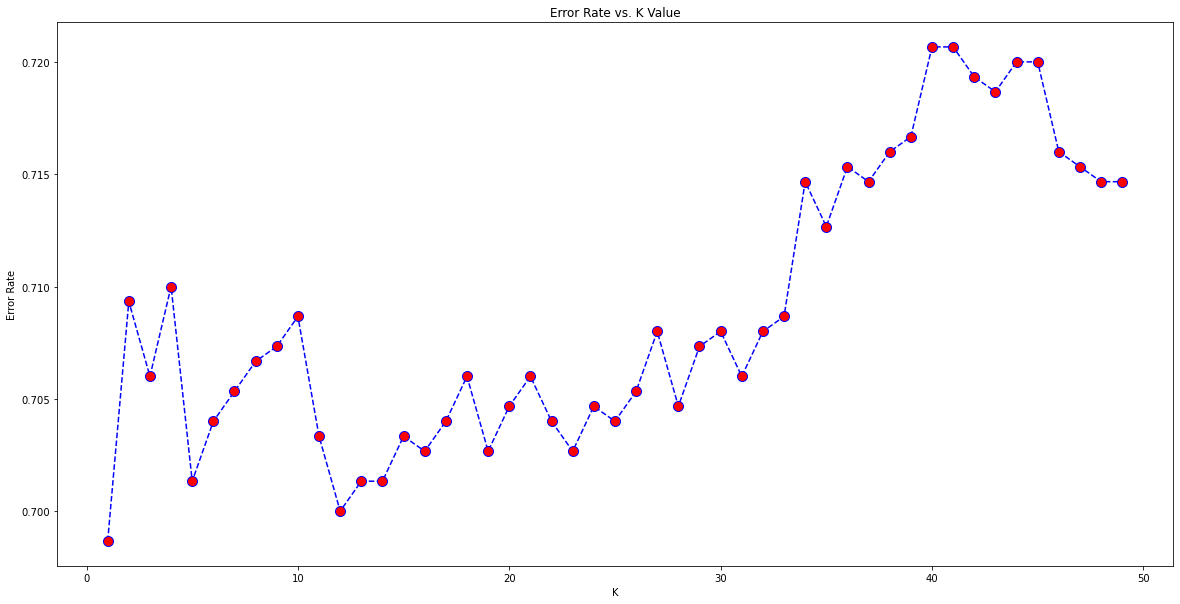

In [8]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
knn = KNeighborsClassifier(n_neighbors=1) # Neighbor = 1
knn.fit(df.drop('label',axis=1),df['label'])
pred = knn.predict(dft.drop('label',axis=1))


In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(dft['label'],pred))


[[ 51   1  46  68  20  64]
 [  7   0  40  74  87  42]
 [  0   0  22 156  72   0]
 [ 11   0  45 179   0  15]
 [  0   0  13  58 143  36]
 [ 42   0  98   7  46  57]]


In [14]:
print(classification_report(dft['label'],pred))

              precision    recall  f1-score   support

        back       0.46      0.20      0.28       250
       front       0.00      0.00      0.00       250
        left       0.08      0.09      0.09       250
       right       0.33      0.72      0.45       250
       start       0.39      0.57      0.46       250
        stop       0.27      0.23      0.25       250

    accuracy                           0.30      1500
   macro avg       0.25      0.30      0.25      1500
weighted avg       0.25      0.30      0.25      1500

